# Medical Cost Insurance


### Linear Regression Model

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read csv file
data = pd.read_csv('medical_cost_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
#replacing 3 to 0
data['sex']=data['sex'].replace('male',1)

#replacing 3 to 0
data['sex']=data['sex'].replace('female',0)

In [5]:
#replacing 3 to 0
data['smoker']=data['smoker'].replace('no',1)
#replacing 3 to 0
data['smoker']=data['smoker'].replace('yes',0)

In [6]:
data.describe() #understand data at high level check the statistic of dataset 

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


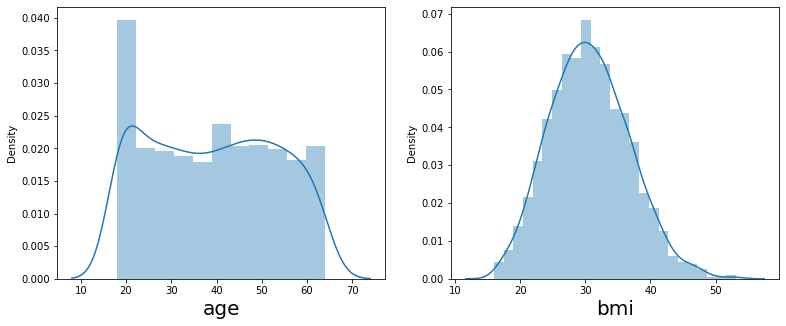

In [7]:
# check in graph and see outlier and skewness for only continuous data
plt.figure(figsize=(20,5))
plotnumber = 1

for column in data[['age','bmi']]:
    if plotnumber <= 3 :
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber += 1
plt.show()

In [8]:
#so i observe some skewness in data 
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore


In [9]:
# new code for deleting outlier here we take std = 3
z_score = zscore(data[['age','bmi']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3 ).all(axis=1)

data = data[filtering_entry]

data.describe()

,age,sex,bmi,children,smoker,charges
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.233883,0.503748,30.601555,1.096702,0.795352,13265.622751
std,14.034654,0.500173,6.000927,1.206548,0.403595,12089.666548
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.237500,0.000000,1.000000,4746.521225
50%,39.000000,1.000000,30.332500,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.595000,2.000000,1.000000,16639.912515
max,64.000000,1.000000,48.070000,5.000000,1.000000,63770.428010


In [10]:
#so some data got deleted 
data.shape

(1334, 7)

In [11]:
# seperating feature and label and also deleting unwanted column region
X = data.drop(['charges','region'],axis = 1)
y = data['charges']

In [12]:
#scale our data using standard sclar

scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

In [13]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)
        

Training Score 0.7522215448616731 RandomState 0
Testing Score 0.7379567602286925 RandomState 0


MAXINING TESTING SCORE 0.7379567602286925 ON RANDOM STATE OF 0
Training Score 0.7489947861215044 RandomState 1
Testing Score 0.750729652365421 RandomState 1


MAXINING TESTING SCORE 0.750729652365421 ON RANDOM STATE OF 1
Training Score 0.7497496337258938 RandomState 2
Testing Score 0.7462623572423263 RandomState 2


Training Score 0.7540007683394684 RandomState 3
Testing Score 0.7345948215285643 RandomState 3


Training Score 0.7520061659782832 RandomState 4
Testing Score 0.7370640101044196 RandomState 4


Training Score 0.7613072488745806 RandomState 5
Testing Score 0.7076870079305763 RandomState 5


Training Score 0.7520927335445735 RandomState 6
Testing Score 0.7411728351580211 RandomState 6


Training Score 0.7418106257134662 RandomState 7
Testing Score 0.771843940317641 RandomState 7


MAXINING TESTING SCORE 0.771843940317641 ON RANDOM STATE OF 7
Training Score 0.7514553061962298 Rando

Training Score 0.740846524495881 RandomState 83
Testing Score 0.7734353212022445 RandomState 83


Training Score 0.7415501174714434 RandomState 84
Testing Score 0.7723833659935555 RandomState 84


Training Score 0.7753933475321999 RandomState 85
Testing Score 0.6494979549678834 RandomState 85


Training Score 0.7340812766929935 RandomState 86
Testing Score 0.7944904747430886 RandomState 86


Training Score 0.7568083727566812 RandomState 87
Testing Score 0.7265336730530172 RandomState 87


Training Score 0.7475804019680856 RandomState 88
Testing Score 0.7509643457142132 RandomState 88


Training Score 0.7511528293698968 RandomState 89
Testing Score 0.7400419842359443 RandomState 89


Training Score 0.7362808913666928 RandomState 90
Testing Score 0.7943876880754612 RandomState 90


Training Score 0.7534278708815213 RandomState 91
Testing Score 0.7356043942196567 RandomState 91


Training Score 0.7511281220852141 RandomState 92
Testing Score 0.7428954376801309 RandomState 92


Training Sc

In [14]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8013153014725081 On Random State 72


In [15]:
# train test split
#our model will build on training data and test on testing data

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=72)

In [16]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [17]:
#training score
regression.score(X_train,y_train)  

0.7297313472363475

In [18]:
#testing score
regression.score(X_test,y_test)  

0.8013153014725081

In [19]:
y_pred=regression.predict(X_test)
y_pred

array([ 3375.10034179,  6572.35206889, 10804.69931988,  5858.78920075,
       12360.86013656, 11957.36088303,  2198.65389942,  2447.90541465,
        8313.96416595, 35704.9256655 , 39469.62710796,  3450.63720353,
       15525.36984014,  3533.92026266, 35427.53634439,  3063.12830199,
       11913.38447996,  8624.46962671, 27493.33567647, 10003.66626383,
       31834.96133595, 15218.80438955, 10930.39413517, 11096.88158575,
       15219.08404665, 11054.48759268,  1667.45649399, 13306.55764718,
       28249.61201108, 34185.85714597, 11105.30778196, 29269.44488138,
       34560.9583367 ,  4296.38130421, 35301.02246141, 11598.02497889,
       12538.78712849,  6160.20736323,  9714.33470166,  6698.7285201 ,
       14087.86555389,  2590.83525204, 11147.73583289, 11304.54193187,
        4466.75462564, 13676.39819402, 15165.49447438,  7677.84810409,
       26941.60557091, 12262.90114833,  2832.70154769, 39822.92470287,
        6499.77244123,  5601.15446205, 28931.50637083, 30163.60498959,
      

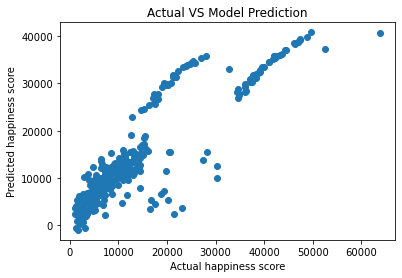

In [20]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual happiness score')
plt.ylabel('Predicted happiness score')
plt.title('Actual VS Model Prediction')
plt.show()

In [21]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [22]:
# again predict 
y_pred = regression.predict(X_test)

In [23]:
#MAE
mean_absolute_error(y_test,y_pred)

4034.254330107446

In [24]:
#MSE
mean_squared_error(y_test,y_pred)

31468024.987111304

In [25]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

5609.636796363139

In [26]:
#now we sucessfully created model and our score is great so we check it for overfitting 
#to check overfitting we have to use regularization technique

# in regularization we have 3 type but we use only 2 



# 3 types are 1) LASSO (L1 form) 2)RIDGE (L2 FORM)  3)ELASTIONET

In [27]:
#BASICALLY LASSO N RIDGE WILL GIVE YOU BEST LEARNING RATE THAT IS ALPHA SCORE AND TRAIN MODEL ACCORDING TO IT

# LASSO MODEL

In [28]:
#import necessary library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [29]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None , max_iter = 100, normalize = True)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100, normalize=True)

In [30]:
##In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
##On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [31]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

3.1254782758536273

In [32]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=3.1254782758536273)

In [ ]:
#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [33]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.8013050876231406

## RIDGE MODEL

In [34]:
############ RIDGE MODEL#########

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(X_train , y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [35]:
##In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
##On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [36]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.001

In [37]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.001)

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [38]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.8013152523938771

In [39]:
# LASSO SCORE = 0.8013050876231406
# RIDGE SCORE = 0.801315252393877

In [40]:
# after seeing LASSO and RIDGE score thus we can conclude that our model was not overfitted model
## for conformation lets see cross validation of the model

### Cross Vaildation

In [41]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.7478005281074089 and the R2 score for Training is 0.7297313472363475 and R2 score for the Testing is0.8013153014725081


At cross fold 3 the cv score is 0.7443731833867325 and the R2 score for Training is 0.7297313472363475 and R2 score for the Testing is0.8013153014725081


At cross fold 4 the cv score is 0.7454793611183665 and the R2 score for Training is 0.7297313472363475 and R2 score for the Testing is0.8013153014725081


At cross fold 5 the cv score is 0.746456746000628 and the R2 score for Training is 0.7297313472363475 and R2 score for the Testing is0.8013153014725081


At cross fold 6 the cv score is 0.745453866669138 and the R2 score for Training is 0.7297313472363475 and R2 score for the Testing is0.8013153014725081


At cross fold 7 the cv score is 0.7444287967227501 and the R2 score for Training is 0.7297313472363475 and R2 score for the Testing is0.8013153014725081


At cross fold 8 the cv score is 0.7425493934077472 and the R2 score for 

In [42]:
# as we see all are giving same result so out model is best model without overfitting 

# Training Score for Linear Regression = 0.7297313472363475
# Testing Score for Linear Regression =  0.8013153014725081